In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
df.shape

(10000, 14)

In [69]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [70]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace=True)

In [72]:
# # Dividing dependent and independent variables
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [73]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


In [74]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
lr_model=classifier.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
#Train decision tree classifier
dt_model=clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=dt_model.predict(X_test)

# Knn

In [78]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=25)
#Train tehe model using the training set
knn_model=clf.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)


# Classification report

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.25      0.00      0.01       497

    accuracy                           0.80      2500
   macro avg       0.53      0.50      0.45      2500
weighted avg       0.69      0.80      0.71      2500



In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
acc_score=accuracy_score(y_test,y_pred)
p_score=precision_score(y_test,y_pred)
re_score=recall_score(y_test,y_pred)
f_score=f1_score(y_test,y_pred)
print(f'Accuracy score of the model is{acc_score}')
print(f'precision score of the model is{p_score}')
print(f'recall score of the model is{re_score}')
print(f'f1_score of the model is{f_score}')

Accuracy score of the model is0.7996
precision score of the model is0.25
recall score of the model is0.004024144869215292
f1_score of the model is0.007920792079207921


In [81]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[1997,    6],
       [ 495,    2]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Label')

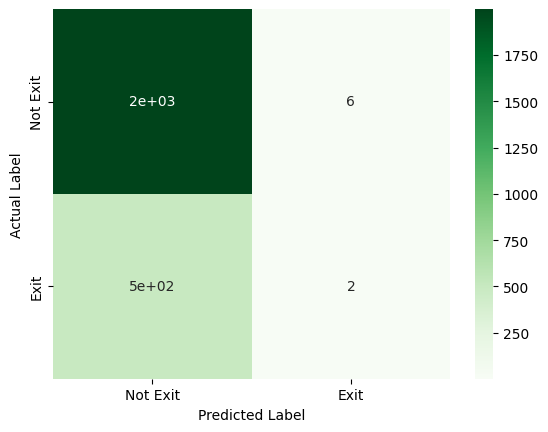

In [82]:
x_axis_labels=['Not Exit','Exit']
y_axis_labels=['Not Exit','Exit']
confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m,annot=True,cmap='Greens',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Linear regression

In [83]:
#Linear regression
from sklearn import linear_model
li_model=linear_model.LinearRegression()
li_model.fit(X_train,y_train)
y_pred=li_model.predict(X_test)


In [92]:
from sklearn.metrics import r2_score

# After making predictions, you can calculate the R-squared score like this:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.14832983425349489


In [91]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 0.28489488144986796
Mean Squared Error: 0.13565279759506468
Root Mean Squared Error: 0.36831073510700807
r2_score: 0.14832983425349489
